--- 
Project for the course in Microeconometrics | Summer 2021, M.Sc. Economics, Bonn University | [Aysu Avcı](https://github.com/aysuavci)

# Replication of Zimmermann (2020) <a class="tocSkip">   
---

In [1]:
!pip install stargazer

In [2]:
!pip install matplotlib

In [3]:
!pip install -U matplotlib

Requirement already up-to-date: matplotlib in /Users/aysuavci/opt/anaconda3/lib/python3.8/site-packages (3.4.2)


This notebook contains the replication of the following study:

> [Zimmermann, F. (2020). The Dynamics of Motivated Beliefs. American Economic Review, 110(2), 337–363](https://www.aeaweb.org/articles?id=10.1257/aer.20180728).


##### Notes:

* I try to remain true to the original naming of the variables, figures and tables as in the study of Zimmermann (2020), so that viewing and comparison would be more convenient.

* For the best viewing, the responsitory can be downloaded from [here](https://github.com/OpenSourceEconomics/ose-data-science-course-project-aysuavci).

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib as plt
from IPython.display import HTML
from stargazer.stargazer import Stargazer, LineLocation
from statsmodels.iolib.summary2 import summary_col

In [16]:
from auxiliary.auxiliary_tools import *
from auxiliary.auxiliary_plots import *
from auxiliary.auxiliary_tables import *

---
# 1.Introduction 
---

The study of Zimmermann(2020) is a lab experiment aiming to examine how motivated beliefs held by individuals continues to be sustained after receiving positive or negative feedback.
The study can be divided into 3 parts:

1. The first part of the study-named “**Motivated Belief Dynamics**” in the paper- is the main study for investigating the causality between different types of feedback (positive or negative) received and reconstruction of belief patterns depending on the elicitation time (directly or 1 month) of the belief after the experiment. 
2. The second part of the study-named “**The Role of Memory**” in the paper- investigates the asymmetry in the accuracy of feedback recall and also recall of IQ test in general that they solve as a part of the experiment. 
3. The final part of the study-named “**The Trade-Off between Motivated and Accurate Belief**” in the paper- that questions whether incentivizing for recall accuracy could mitigate the motivated reasoning that participants employ.

In this project notebook, the main study-first part- will be replicated; the part where Zimmermann (2020) used also **difference-in-difference (DID) models** for their estimations. In the next section (Section 2), I will give a quick background I will explain the relevant parts of the experimental design for the two parts of the study and introduce all treatment groups and variables that are going to be mentioned in this notebook. In Section 3, I will explain the estimation strategy employed by Zimmermann (2020) and the models being used….(going to change)


---
# 2. Background for the Experiment and Hypothesis
---
Personally, I have always been interested in the question of how individual beliefs are formed and sustained or changed over time. In the neoclassical economics framework, any changes in beliefs follow Bayes Rule’s since it is accepted that all agents are rational and unbiased. However, many studies in the literature of motivated beliefs showed that individuals deviate from these Bayesian predictions and manipulate their beliefs in a self-serving way; and some studies like Eil and Rao 2011 or Zimmermann 2020 tried to address the asymmetry in belief updating as well. I see the study of Zimmermann (2020) as an influential study to study motivated belief dynamics because of the experiment design that is been employed. The design of Zimmermann (2020) allows comparing the belief updating across signals received (asymmetry) and also across time (short-run and long-run updating) by employing control and various treatment groups.
 
**Main Hypothesis:** *Individuals’ engagement with belief updating follows an asymmetric pattern, putting more weight on positive signals and less on the negative signals, which is more pronounced for long-term since negative signal’s effects fade over time.* 

Using DID models for analysis is suitable for this study because, first of all, it is impossible to make one experiment subject expose to two different treatments while keeping everything constant in this experiment to examine individual-level effects. Secondly, since this is a randomly assigned experiment we can assume subjects do not differ between the control group and treatment groups. Also, between the control group and treatment group Zimmermann (2020) made sure to keep everything constant and only made the feedback condition vary. Also, DID was easily implemented as an interaction term between time treatment and feedback dummy allowing for causal inferences on belief dynamics in line with the researcher’s goal and with the group of interest which is the individuals who received a negative signal and in the treatment group 1 month and their differences compared to other groups in belief updating. In addition to these, employing DID models also allowed Zimmermann(2020) to add the fixed rank effects interacted with treatment which serve as a control for possible  chracteristic difference due to rank groups between treatments. Also, having a control condition for 1-month treatment which serve as a robustness check for potential beliefs changes due to time trends that may exist in the absence of feedback. 

---
# 3. Experimental Design
---
1. Subjects completed an IQ test where they need to solve 10 Raven matrices.
2. Subjects were randomly assigned to groups of 10.
3. Subjects were asked to estimate their belief about the likelihood of being ranked in the upper half of their group in terms of a percentage point. Full probability distributions for every possible rank is also elicited.
4. Subjects were given noisy but true information about their rank by randomly selecting 3 participants from their group and telling them whether they were rank higher or lower than these 3 participants. If a subject is told that they ranked higher than 2 or 3 participants in their group, the subject is considered to be in the positive feedback group. They considered being in the negative feedback group if otherwise.
5. After receiving the feedbacks, subjects are divided into two treatment groups randomly: `condifence_direct` and `confidence_1monthlater`.
6. In the `confidence_1monthlater` treatment, subjects are asked to elicit their beliefs 1 month later; and in the `condifence_direct` treatment, group subjects are asked to elicit their beliefs after the feedback. `condifence_direct`has also two subgroups: `condifence_direct_immediate` and `condifence_direct_15minutelater`.


**Main Variables**

|Treatment groups|Feedback types|Outcomes|Other variables|
|---|---|---|---|
|`confidence_1monthlater`|Positive|Belief Adjustment|rank|
|`condifence_direct_immediate`|Negative||
|`condifence_direct_15minutelater`|||
|`no_feedback`|||


---
# 4. Identification
--- 

The first part of the experiment is dedicated to investigating the causality between the effect of feedback and belief adjustments of participants that are in two different treatment groups that vary depending on time: _CondifenceDirect_ and _Condifence1month_. The causality is established by two key components in the experiment. First of all, Zimmermann(2020) elicit peoples prior beliefs about their probability of ranking in the upper half of the group and then they elicited again after participants received the feedback. So, for each participant, they had a clear measure of belief updating which is possibly caused by the feedback and in line with the type of feedback. The second and the most important component of the experiment, that ensured causal identification, is the noisy feedback component. In this experiment rather than randomly assigning a subject into a negative or positive feedback group directly, Zimmermann(2020) randomly choose 3 other participants within the subject’s group to compare their rank and provide them with 3 comparisons. In this way, subjects indeed received true feedback but a noisy one. So, it is possible for two subjects with the same rank to receive different types of feedback. By adopting such an experimental design, Zimmermann(2020) ensured that potential asymmetries in the belief dynamics cannot be explained by the individual difference between participants. 

In addition to investigating the causal relationship between belief dynamics and feedback, another goal of the experiment is to observe the effect of time on this relationship. For that, Zimmermann(2020) assigned participants randomly to two groups: Confidence1month and CondifenceDirect. ConfidenceDirect is also divided into two subgroups(immediate and 15 minutes later belief elicitation) to investigate the possible short-term dynamics in belief adjustment, however, this replication will not cover that part of the study. 

CHANGE THE GRAPH

---
# 5. Empirical Strategy
---


In the study, the belief adjustment is defined as the difference between the elicited belief after the feedback and the belief before the feedback, formally

\begin{equation}
Pr(upperhalf)^{post}_{i} - Pr(upperhalf)^{prior}_{i}
\end{equation}

where $Pr(upperhalf)_{i}$ represents the subject ${i}$'s given probability of being in the upperhalf of the group.

To compare belief adjustments between positive and negative feedbacks, a normalized version of the belief adjustment norm is also formed as below:


$$
beliefadjustmentnorm_i = \left\{
    \begin{array}\\
        Pr(upperhalf)^{post}_{i} - Pr(upperhalf)^{prior}_{i} & \mbox{if } \ feedback \ positive \\
        (-1) x (Pr(upperhalf)^{post}_{i} - Pr(upperhalf)^{prior}_{i}) & \mbox{if } \ feedback \ negative \\
    \end{array}
\right.
$$


The difference-in-difference models, formally in the form of 

\begin{equation}
beliefadjustmentnorm_i = \alpha + \beta feedback_i + \gamma T_i + \delta I_i + X_i \gamma + \epsilon_i
\end{equation}

are estimated for the purpose of establishing dynamic belief patterns. $feedback_i$ is the dummy variable for feedback and $T_i$ is the type of treatment. $I_i$ is for the interation term that is a generated dummy for the interest group, interest group being subjects who are in the `confidence_1monthlater`and received a negative feedback; parameter $\delta$ is therefore captures the belief dynamics. In order to form a causal inference, Zimmermann (2020) control for rank and IQ test scores; these variables are captured by $X_i$, set of control variables. 

As another control variable, Bayesian belief adjustments are also used for some specifications. Zimmermann (2020) calculated Bayesian predictions, using individuals full prior probability distribution and the feedback type that they received. The Bayesian belief adjustment is then, produced in the same way as the belief adjustment

\begin{equation}
Pr(upperhalf)^{postBayes}_{i} - Pr(upperhalf)^{prior}_{i}
\end{equation}

where $Pr(upperhalf)^{postBayes}_{i}$ is the calculated Bayesian prediction for the subject $i$.

Another specification within the study is adding the rank fixed effects interacted with treatment. In this way, Zimmermann (2020) was able to control the differentiation of possible different characteristics due to ranking between treatment groups.

Zimmermann (2020) choose to perform ordinary least square (OLS) estimates with type HC1 heteroscedasticity robust covariance. Most of the main results are produced with this linear regression and I will use this type of regression in the table replications.

---
# 6. Replication of Zimmermann (2020)
---
## 6.1. Main Results
### 6.1.1 Data & Descriptive Statistics

In [5]:
df = pd.read_stata('data/data.dta')

In [18]:
#Adjustments for better viewing
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 7)
pd.set_option("display.max.rows", 30)

In [19]:
#Viewing data
df.head()

,treatment,rscore,performance1,performance2,performance3,performance4,performance5,performance6,performance7,performance8,performance9,wspt,donation,prior_median,prior_1,prior_2,prior_3,prior_4,prior_5,prior_6,prior_7,prior_8,prior_9,prior_10,rank,pos_comparisons,neg_comparisons,repeat_neg_comparisons,repeat_pos_comparisons,risk_investment,recall_neg_comparisons,recall_pos_comparisons,big5_1,big5_2,big5_3,big5_4,big5_5,big5_6,big5_7,big5_8,big5_9,big5_10,big5_11,big5_12,big5_13,big5_14,big5_15,gender,field_of_study,student,posterior_median,recallfeedback,qualtrics,recall_part_IQtest,recall_part_feedback,recall_parts_nonIQ,pricelist1,pricelist2,pricelist3,pricelist4,pricelist5,pricelist6,pricelist7,pricelist8,pricelist9,pricelist10,pricelist11,pricelist12,pricelist13,pricelist14,pricelist15,treatgroup,dummynews_goodbad,beliefadjustment,beliefadjustment_normalized,post_1,post_2,post_3,post_4,post_5,post_6,post_7,post_8,post_9,post_10,posterior_median_bayes,beliefadjustment_bayes,beliefadjustment_bayes_norm,dummytreat_direct1month
0,belief_announcement,4,1,3,4,4,5,5,5,6,8,6,1,53,2,4,9,14,24,16,13,9,7,2,7,2.0,1.0,1.0,2.0,80,1.0,2.0,1,2,4,3,2,4,3,4,2,5,3,4,3,4,4,0,Geographie,1,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,15.0,15.0,0.000000,0.0348774,0.1201635,0.2059946,0.3269755,0.1743869,0.0956403,0.0343324,0.0076294,0.0000000,68.8010899,15.8010899,15.8010899,NaN
1,belief_announcement,6,3,4,5,5,6,6,7,8,9,7,5,70,10,10,10,20,20,10,5,5,5,5,4,2.0,1.0,1.0,2.0,150,1.0,2.0,2,2,6,2,5,2,7,2,2,7,3,6,2,2,3,1,psychologie,1,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,-10.0,-10.0,0.000000,0.0910384,0.1394026,0.3072546,0.2844950,0.1137980,0.0384068,0.0199147,0.0056899,0.0000000,82.2190612,12.2190612,12.2190612,NaN
2,belief_announcement,8,4,6,7,7,7,8,8,9,10,5,3,85,1,4,30,30,20,9,2,2,1,1,3,3.0,0.0,0.0,2.0,80,0.0,2.0,3,5,6,3,2,3,4,4,2,2,3,2,2,3,5,1,Medienwissenschaft,1,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.032123,0.0902441,0.4534238,0.2855380,0.1101613,0.0253812,0.0023795,0.0007050,0.0000441,0.0000000,97.1490262,12.1490262,12.1490262,NaN
3,belief_announcement,5,4,6,7,7,7,8,8,9,10,5,0,80,3,6,6,25,40,5,5,4,3,3,9,0.0,3.0,3.0,0.0,150,3.0,0.0,1,2,7,3,2,2,6,4,2,4,1,4,1,2,3,0,Lebensmittelchemie,1,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,-35.0,35.0,0.000000,0.0005947,0.0047577,0.0669045,0.2537417,0.0619487,0.1070473,0.1359897,0.1522450,0.2167707,32.5998612,-47.4001388,47.4001388,NaN
4,belief_announcement,5,1,3,4,4,5,5,5,6,8,3,0,25,0,0,0,0,25,5,5,20,20,25,4,3.0,0.0,0.0,3.0,100,0.0,3.0,4,4,7,3,2,1,7,2,6,3,2,4,1,1,4,1,Geographie,1,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,45.0,45.0,0.000000,0.0000000,0.0000000,0.0000000,0.8311170,0.0851064,0.0359043,0.0425532,0.0053191,0.0000000,83.1117021,58.1117021,58.1117021,NaN


In [8]:
#Renaming treatgroup for easier coding
tg_conditions = [
    (df['treatment'] == 'belief_announcement'),
    (df['treatment'] == 'confidence_1monthlater'),
    (df['treatment'] == 'confidence_direct_15minuteslater'),
    (df['treatment'] == 'confidence_direct_immediate'),
    (df['treatment'] == 'memory'),
    (df['treatment'] == 'memory_high'),
    (df['treatment'] == 'nofeedback'),
    (df['treatment'] == 'tournament_announcement'),
]
tg_values = [1, 2, 3, 4, 5, 6, 7, 8]
df['treatgroup'] = np.select(tg_conditions, tg_values)

Throughout this study feedback groups will be addressed using the dummy variable `dummynews_goodbad`. As is mentioned above, if a subject received more than 2 positive comparisons they are considered to be in the positive feedback group; if else in the negative feedback group.

In [9]:
#Creating dummy variable for good/bad news (if good = 0, if bad = 1)
df["dummynews_goodbad"] = np.nan
df.loc[(df['pos_comparisons'] == 2) | (df['pos_comparisons'] == 3), 'dummynews_goodbad'] = 0
df.loc[(df['pos_comparisons'] == 0) | (df['pos_comparisons'] == 1), 'dummynews_goodbad'] = 1

In [10]:
#Belief adjustment
df["beliefadjustment"] = df["posterior_median"] - df["prior_median"]
#Normalized belief adjustment
df["beliefadjustment_normalized"] = np.nan
df.loc[df['dummynews_goodbad'] == 0, 'beliefadjustment_normalized'] = df['beliefadjustment']
df.loc[df['dummynews_goodbad'] == 1, 'beliefadjustment_normalized'] = df['beliefadjustment']*-1

### 6.1.2 Belief Adjustment Distribution

<function auxiliary.auxiliary_plots.Main_Figure1(df)>

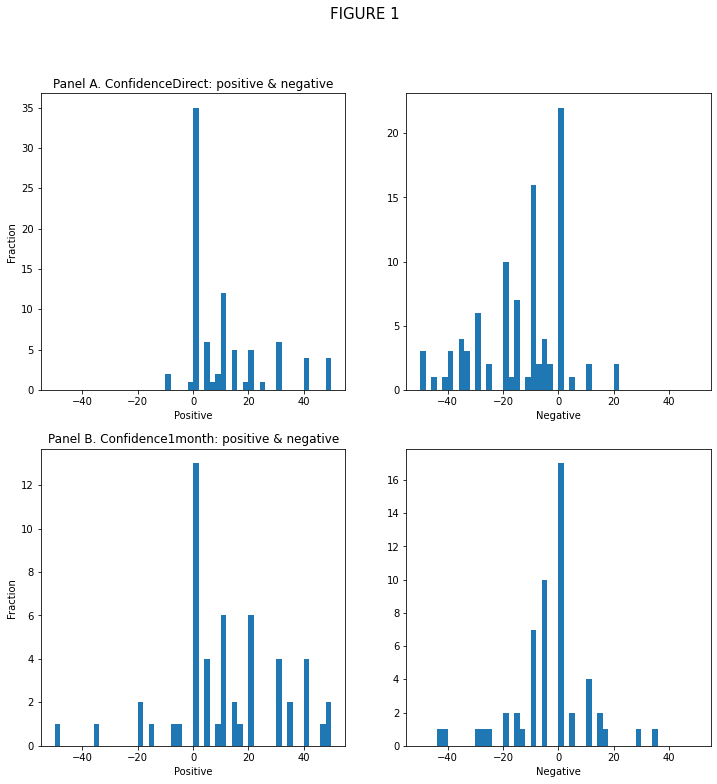

In [20]:
Main_Figure1(df)